# Titanic Data Visualization
This kernel will look at the Titanic Data to analyze the Survival rates based on different factors.  The provided Training Data Set will be used to process and visualize the data.

<hr>

## Load packages and Data
- **readr** will be used to read in the Data using the *read_csv* function
- **dplyr** will be used for most of the data processing and manipulation
- **ggplot2** will be used for data visualization

In [1]:
library(readr) # Reading in data
library(dplyr) # Data manipulation
library(tibble) # Data manipulation
library(ggplot2) # Data visualization
library(ggthemes) # Data visualization
library(RColorBrewer) # Data visualization


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
titanic <- read_csv("../Data/titanic_train.csv")
head(titanic)

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Convert Variable into Factors
- Convert **Pclass**, **Survived** and **Sex** Variables into Factors using the *mutate* function
- Keep **Age** numeric

In [3]:
titanic <- titanic %>%
  mutate(Pclass = factor(Pclass), 
         Survived = factor(Survived), 
         Sex = factor(Sex)) 

**Age** has some missing values (NA).  Missing values will be ignored for now

<hr>

# 1. Look at the Total Survival Rate 
- Use *table* function to look at the Survival rates
- Convert table to a **tibble** (similar to dataframe) to use later when plotting with ggplot2 to add text to the graph
- Use *rename* function to rename default Column names

In [4]:
survival <- table(titanic$Survived) %>%
  as_tibble() %>%
  rename(Survived = Var1, Count = n)

survival

Survived,Count
0,549
1,342


## Look at the Total Survival Rate Proportion
- Use *prop.table* to get the proportion

In [5]:
survival_ratio <- prop.table(table(titanic$Survived)) %>%
  as_tibble() %>%
  rename(Survived = Var1, Percentage = n) %>%
  mutate(Percentage = round(Percentage, 2)*100)

survival_ratio

Survived,Percentage
0,62
1,38


## Plot the Total Survival Rate 
- Using a barplot with *theme_few* theme from the **ggthemes** package
- Add some styling to the plot: Center the Title and color, Edit the Legends 
- Use tibble of survival data in *geom_text* to add the Count to the plot
- Use tibble of survival data ratio in *geom_label* to add the Percentages to the bars

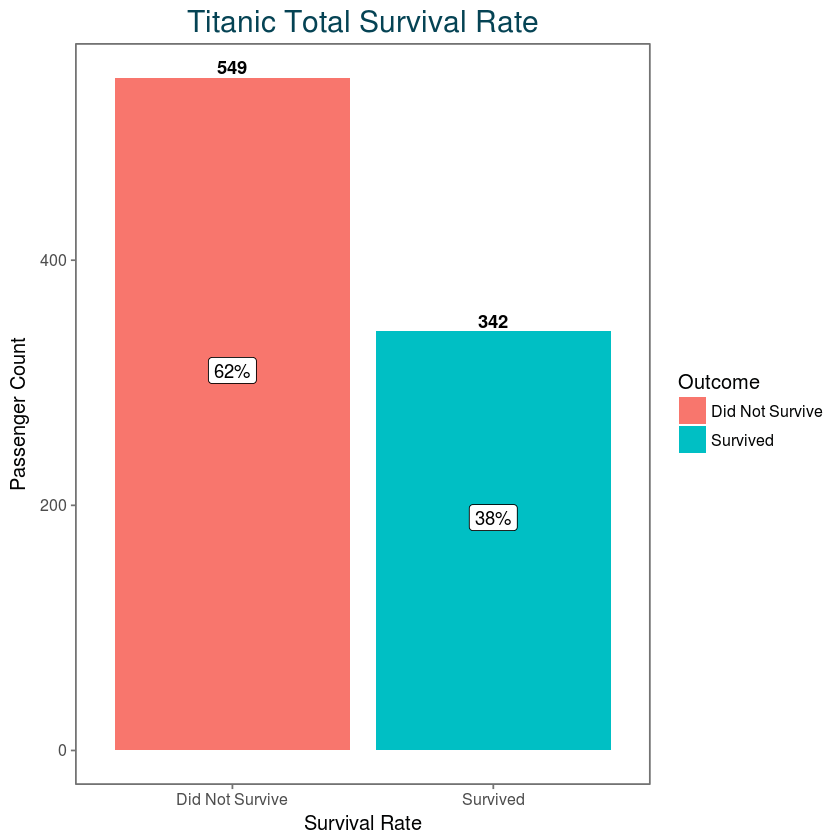

In [6]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  geom_text(data = survival, 
            aes(x = Survived, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust=-0.25,
            fontface = "bold") +
  geom_label(data = survival_ratio, 
             aes(x = Survived, y = Percentage, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 5)) +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Total Survival Rate") +
  scale_x_discrete(name= "Survival Rate", labels = c("Did Not Survive", "Survived")) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))

- Only 38% of people survived (342 out of total of 891)

<hr>

# 2. Look at Survival Rate by Gender
- Group the data by **Sex** using the *group_by* function 
- Get the total Count of passengers in each gender group with *summarise* function

In [7]:
gender <- titanic %>%
  group_by(Sex) %>%
  summarise(Count = n())

gender

Sex,Count
female,314
male,577


## Look at the Gender Survival Rate Proportion
- Group by **Sex** and **Survived** to get the Count of survived by gender using *summarise* function
- Use *mutate* to add a new Percentage variable

In [8]:
gender_ratio <- titanic %>%
  group_by(Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

gender_ratio

Sex,Survived,Count,Percentage
female,0,81,26
female,1,233,74
male,0,468,81
male,1,109,19


## Plot the Gender Survival Rate
- Using a barplot
- Represent Gender on the x-axis
- Use Color to represent Survival on the Plot
- Add the Count and Percentage using *geom_text* and *geom_label* respectively

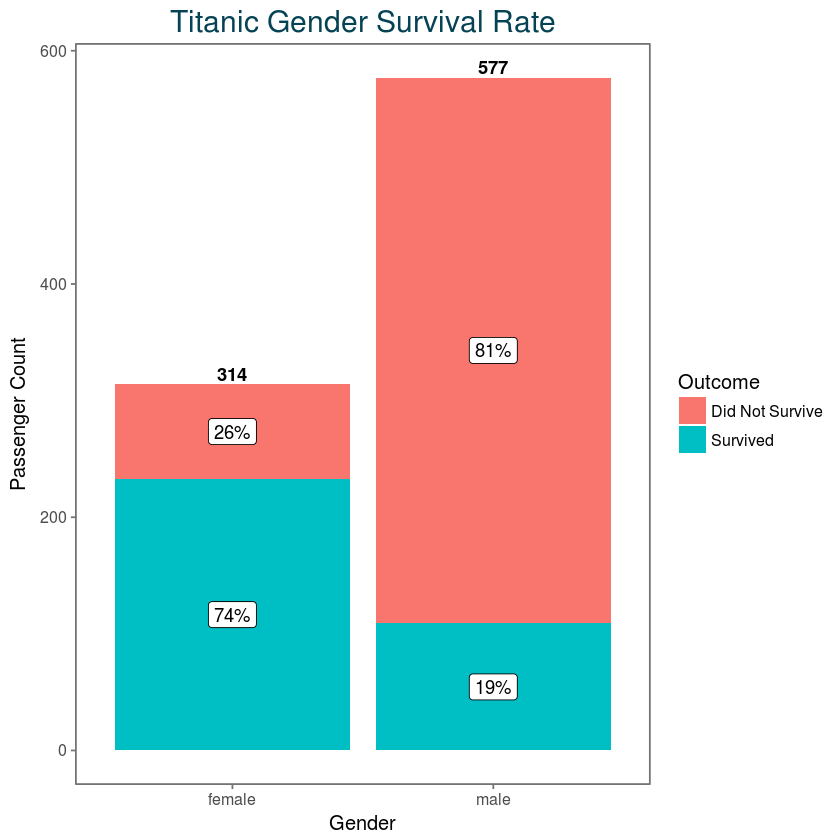

In [9]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  geom_text(data = gender, 
            aes(x = Sex, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust=-0.25, 
            fontface = "bold") +
  geom_label(data = gender_ratio, 
             aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 0.5)) +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Gender Survival Rate") +
  scale_x_discrete(name= "Gender") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- Out of total of 314 Females, 74% Survived and 26% Did Not Survive
- Out of total 577 Males, only 19% Survived and 81% Did Not Survive

<hr>

# 3. Look at Survival Rate by Ticket Class
- Group the data by **Pclass** using the *group_by* function
- Get the total Count of passengers in each **Pclass** with *summarise* function 

In [10]:
pclass <- titanic %>%
  group_by(Pclass) %>%
  summarise(Count = n())

pclass

Pclass,Count
1,216
2,184
3,491


## Look at the Pclass Survival Rate Proportion
- Group by **Pclass** and **Survived** to get the Count of survived in each **Pclass** using *summarise* function
- Use *mutate* to add a new Percentage variable

In [11]:
pclass_ratio <- titanic %>%
  group_by(Pclass, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_ratio

Pclass,Survived,Count,Percentage
1,0,80,37
1,1,136,63
2,0,97,53
2,1,87,47
3,0,372,76
3,1,119,24


## Plot the Gender Survival Rate
- Using a barplot using black and white theme *theme_bw* from **ggplot2**
- Represent Pclass on the x-axis
- Use Color to represent Survival on the Plot
- Add the Count and Percentage using geom_text and geom_label respectively

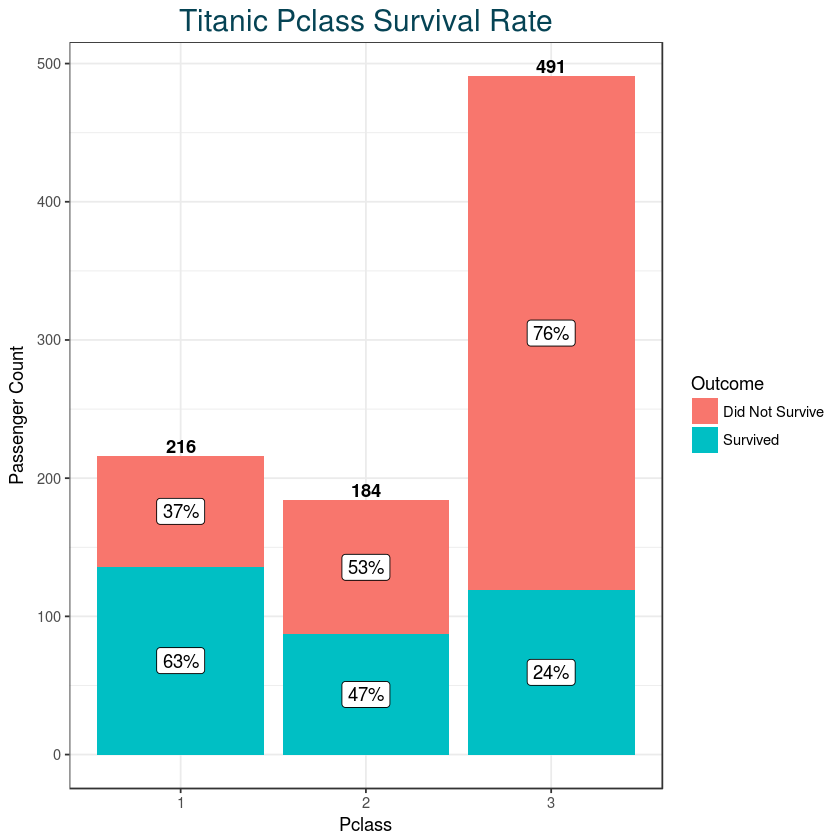

In [12]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Pclass, fill = Survived)) +
  geom_text(data = pclass, 
            aes(x = Pclass, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust=-0.25, 
            fontface = "bold") +
  geom_label(data = pclass_ratio, 
             aes(x = Pclass, y = Count, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Pclass Survival Rate") +
  scale_x_discrete(name= "Pclass") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- 1st Class: 216 Passengers
  - 63% Survived
  - 37%  Did Not Survive
- 2nd Class: 184 Passengers
  - 47% Survived
  - 53%  Did Not Survive
- 3rd Class: 491 Passengers
  - 24% Survived
  - 76%  Did Not Survive

<hr>

# 4. Look at Gender Proportion in each Class
- Before looking at the proportion of Males and Females that Survived in each **Pclass**, let's look at the Gender proportion in each class

In [13]:
pclass_gender <- titanic %>%
  group_by(Pclass) %>%
  summarise(Count = n())

pclass_gender

Pclass,Count
1,216
2,184
3,491


## Look at the Pclass Gender Proportion

In [14]:
pclass_gender_ratio <- titanic %>%
  group_by(Pclass, Sex) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_ratio

Pclass,Sex,Count,Percentage
1,female,94,44
1,male,122,56
2,female,76,41
2,male,108,59
3,female,144,29
3,male,347,71


## Plot the Pclass Gender Proportion
- Represent Pclass on the x-axis
- Use Color to represent Gender on the Plot using the **RColorBrewer** package
- Add the Count and Percentage using geom_text and geom_label respectively

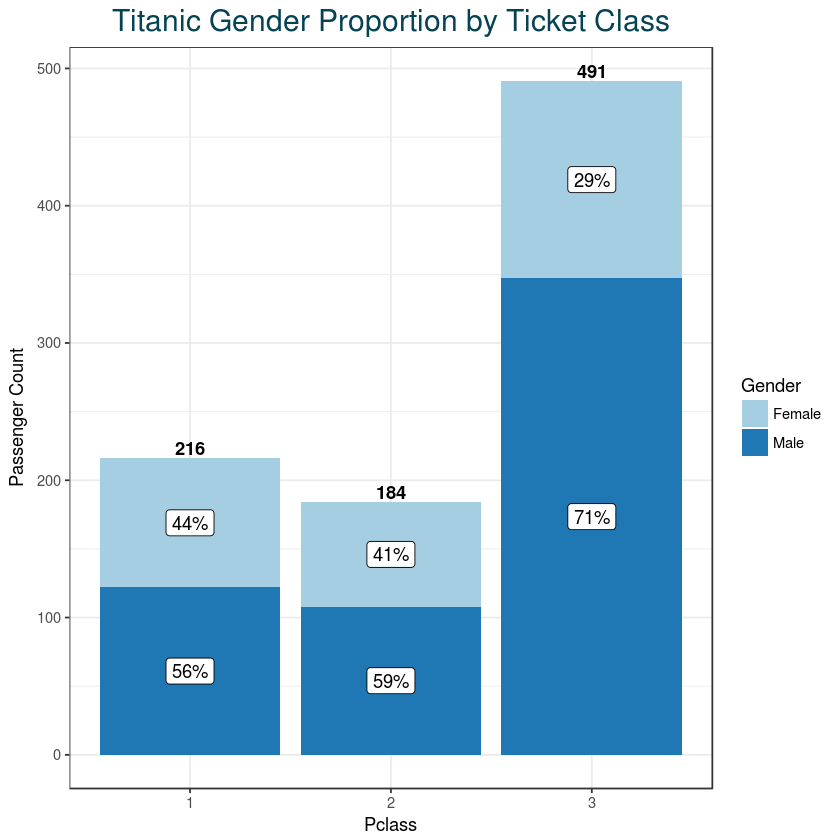

In [15]:
titanic %>%
  ggplot() +
  geom_bar(aes(x = Pclass, fill = Sex)) +
  geom_text(data = pclass_gender, 
            aes(x = Pclass, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust=-0.25, 
            fontface = "bold") +
  geom_label(data = pclass_gender_ratio, 
             aes(x = Pclass, y = Count, label = paste0(Percentage, "%"), group = Sex), 
             position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Gender Proportion by Ticket Class") +
  scale_x_discrete(name= "Pclass") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_brewer(name = "Gender", labels = c("Female", "Male"), palette = "Paired")

- 1st Class: 216 total Passengers
  - Females: 44%
  - Males: 56%
- 2nd Class: 184 total Passengers
  - Females: 41%
  - Males: 59%
- 3rd Class: 491 total Passengers
  - Females: 29%
  - Males: 71%
- Higher ratio of Male to Female in 3rd Class compared to 1st and 2nd Class

<hr>

# 5. Look at Survival Rate by Gender in each Pclass
- First look at Pclass Gender Proportion
- Second look at Survival Rate by Gender in each Pclass

In [16]:
pclass_gender_ratio <- titanic %>%
  group_by(Pclass, Sex) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_ratio

Pclass,Sex,Count,Percentage
1,female,94,44
1,male,122,56
2,female,76,41
2,male,108,59
3,female,144,29
3,male,347,71


In [17]:
pclass_gender_survived_ratio <- titanic %>%
  group_by(Pclass, Sex, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

pclass_gender_survived_ratio

Pclass,Sex,Survived,Count,Percentage
1,female,0,3,3
1,female,1,91,97
1,male,0,77,63
1,male,1,45,37
2,female,0,6,8
2,female,1,70,92
2,male,0,91,84
2,male,1,17,16
3,female,0,72,50
3,female,1,72,50


## Plot the Gender Survival Proportion by Pclass
- Represent Sex on the x-axis
- Use Color to represent Survival
- Use faceting to separate by **Pclass** using *facet_wrap*
- Add the Count and Percentage using geom_text and geom_label respectively

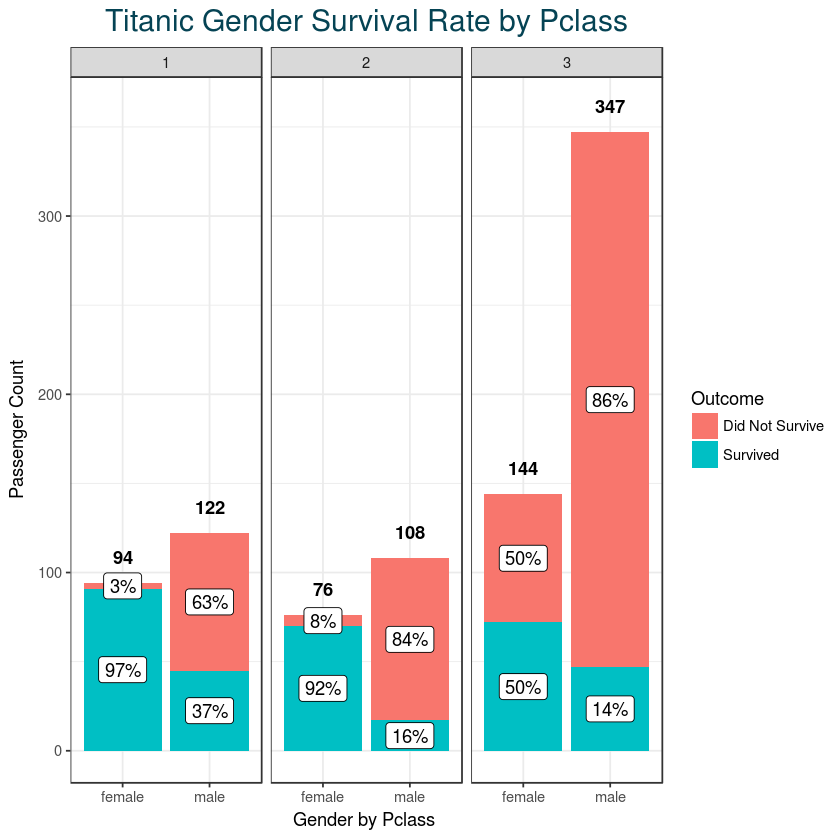

In [18]:
# Using facet_wrap(~ Pclass)
titanic %>%
  ggplot() +
  geom_bar(aes(x = Sex, fill = Survived)) +
  facet_wrap(~ Pclass) +
  geom_text(data = pclass_gender_ratio, 
            aes(x = Sex, y = Count, label = Count), 
            position = position_dodge(width=0.9), 
            vjust= -1.5, 
            fontface = "bold") +
  geom_label(data = pclass_gender_survived_ratio, 
             aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 0.5)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Gender Survival Rate by Pclass") +
  scale_x_discrete(name= "Gender by Pclass ") +
  scale_y_continuous(name = "Passenger Count", limits = c(0,360)) +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

### Plot using *facet_grid* to separate Gender and Pclass

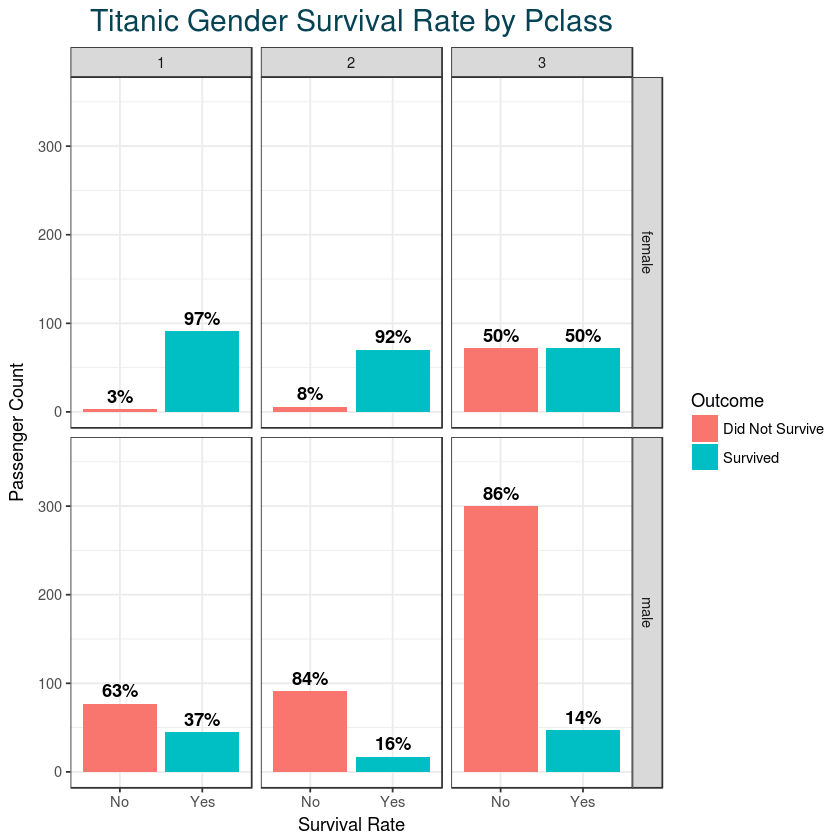

In [19]:
# Using facet_grid(Sex ~ Pclass) to separate Gender and Pclass
titanic %>%
  ggplot() +
  geom_bar(aes(x = Survived, fill = Survived)) +
  facet_grid(Sex ~ Pclass) +
  geom_text(data = pclass_gender_survived_ratio, 
            aes(x = Survived, y = Count, label = paste0(Percentage, "%")), 
            position = position_dodge(width=0.9), 
            vjust= -0.5, 
            fontface = "bold") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Gender Survival Rate by Pclass") +
  scale_x_discrete(name= "Survival Rate", labels = c("No", "Yes")) +
  scale_y_continuous(name = "Passenger Count", limits = c(0,360)) +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- 1st Class:
  - Females: 
    - 97% Survived
    - 3% Did Not Survive
  - Males:
    - 37% Survived
    - 63% Did Not Survive
- 2nd Class:
  - Females:
    - 92% Survived
    - 8% Did Not Survive
  - Males:
    - 16% Survived
    - 84% Did Not Survive
- 3rd Class:
  - Females:
    - 50% Survived
    - 50% Did Not Survive
  - Males:
    - 14% Survived
    - 86% Did Not Survive

<hr>

# 6. Look at Survival Rate by Age
- First look at the **Age** distribution 
- Second look at Survival rate by **Age**

## Find the Average Age of Passengers

In [20]:
# Remove Missing Values (177 NA Values)
median(titanic$Age, na.rm = TRUE)

[1] 28

- Average Age of Passengers is around 28

## Plot the Age Distribution
- Using a Histogram (Continious Data)
- Using binwidth = 5 years
- Ignoring 177 observations with missing Age

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

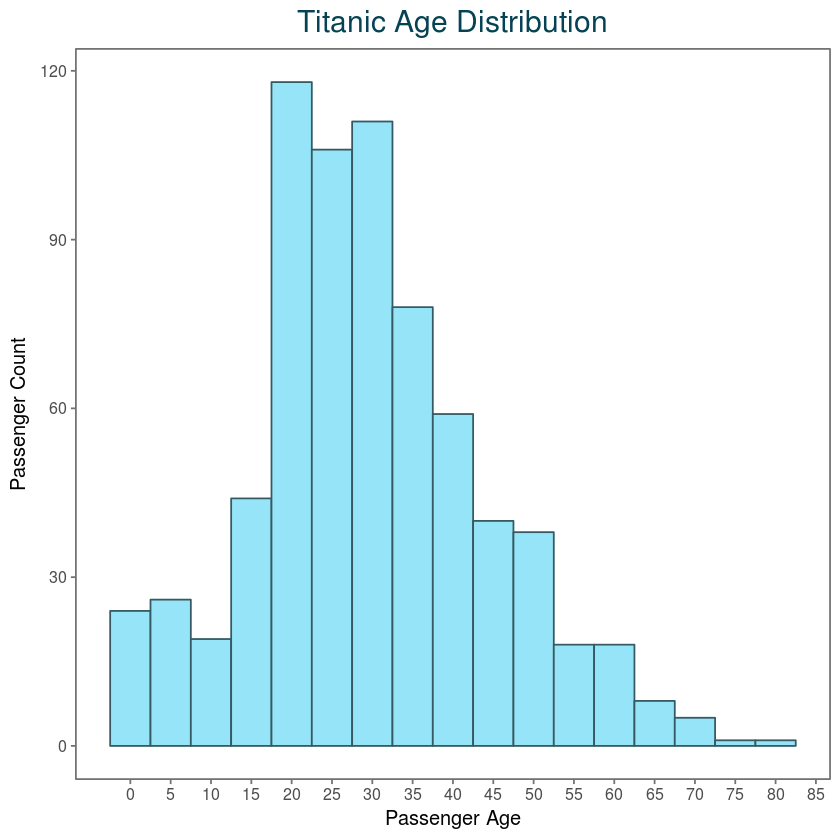

In [21]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = Age), binwidth = 5, color = "#355a63", fill = "#96e4f7") +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Age Distribution") +
  scale_x_continuous(name= "Passenger Age", breaks = 5*c(0:18)) +
  scale_y_continuous(name = "Passenger Count")

## Plot the Survival Rate by Age
- Use automatic fill based on Survived
- Ignoring 177 observations with missing Age

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

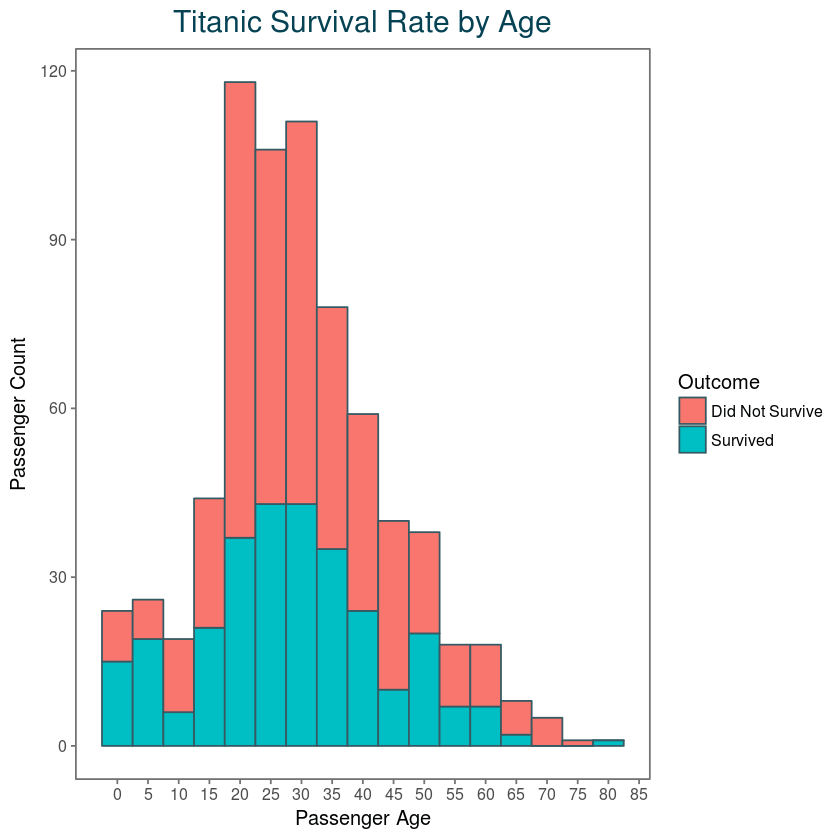

In [22]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = Age, fill = Survived), binwidth = 5, color = "#355a63") +
  theme_few() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Survival Rate by Age") +
  scale_x_continuous(name= "Passenger Age", breaks = 5*c(0:18)) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

<hr>

# 7. Look at Survival Rates by Age when segmented by Gender and Class

### Look At Survival Rate based on Gender and Class Segmented by Age
- Females that Did NOT Survive in 1st and 2nd Class (3% and 8%) seem to be randomly distributed by Age

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

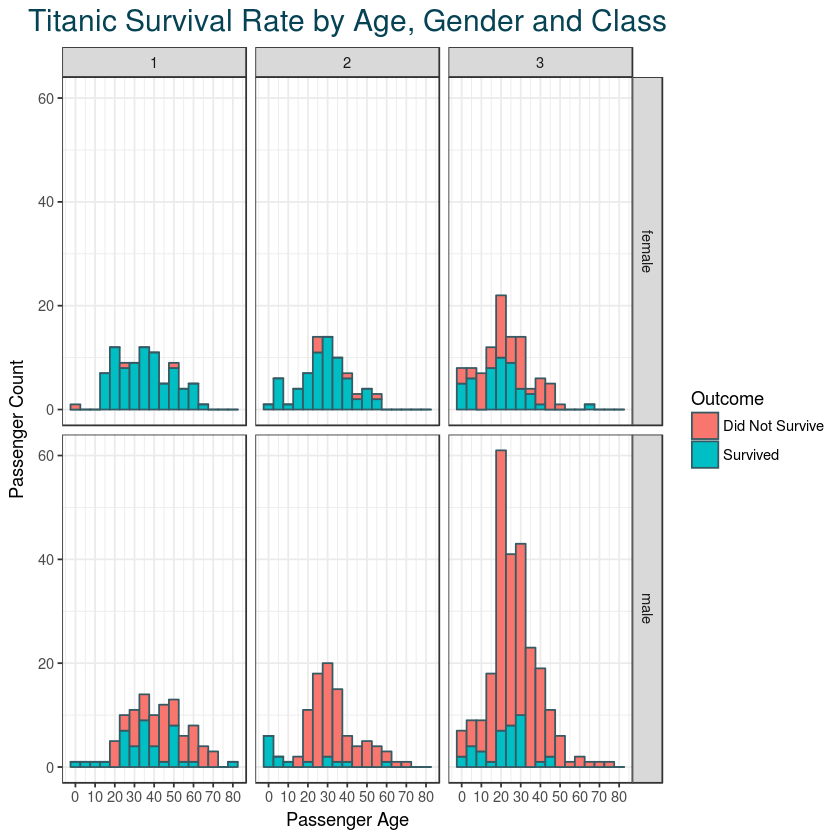

In [23]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = Age, fill = Survived), binwidth = 5, color = "#355a63") +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Survival Rate by Age, Gender and Class") +
  scale_x_continuous(name= "Passenger Age", breaks = 10*c(0:8)) +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- 1st Class:
  - Females:
    - Most Females in 1st Class Survived: 97% from previous data
  - Males:
    - Most Males up to Age 15 Survived
- 2nd Class:
  - Females:
    - Most Females in 2nd Class Survived: 92% from previous data
  - Males:
    - Males up to Age of 10 Survived
    - Majority of Males Age 15 and above Did NOT Survive
    - Almost all Males Age 45 and above Did NOT Survive
- 3rd Class:
  - Females;
    - 50% of Females Survived (based on previous data)
    - Can't tell much more looking at Age
  - Males:
    - 86% Did Not Survive (based on previous data)
    - Most Males 35 and above Did NOT Survive

<hr>

# 8. Look at Survival Based on Family Size

## Add a Varibale for Family Size
- Combine **SibSp** and **Parch** variables together and add 1 (for self) 
- Use the *mutate* function to add **FamilySize** to the dataset

In [24]:
titanic <- titanic %>%
  mutate(FamilySize = 1 + SibSp + Parch) 

## Look at Survival Rate Based on Family Size

In [25]:
titanic %>%
  group_by(FamilySize, Survived) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count/sum(Count)*100))

FamilySize,Survived,Count,Percentage
1,0,374,70
1,1,163,30
2,0,72,45
2,1,89,55
3,0,43,42
3,1,59,58
4,0,8,28
4,1,21,72
5,0,12,80
5,1,3,20


## Plot Survival Rate Based on Family Size

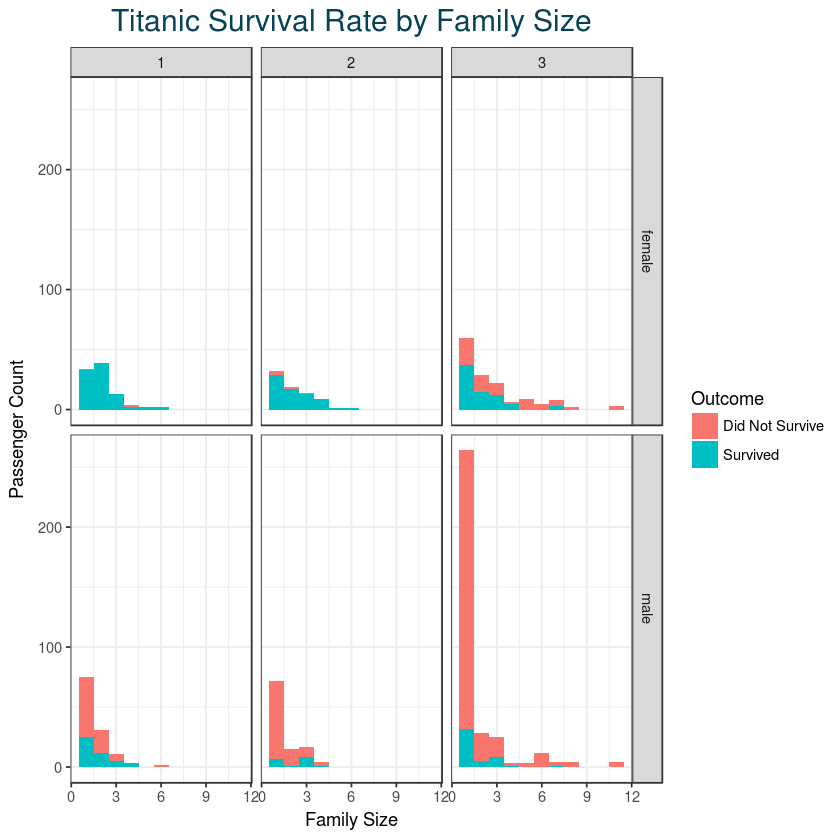

In [26]:
titanic %>%
  ggplot() +
  geom_histogram(aes(x = FamilySize, fill = Survived), binwidth = 1) +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18, color = "#054354")) +
  ggtitle("Titanic Survival Rate by Family Size") +
  scale_x_continuous(name = "Family Size") +
  scale_y_continuous(name = "Passenger Count") +
  scale_fill_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- Majority of Males amd Females in 3rd Pclass with Family Size of 5 and above  Did NOT Survive

<hr>

# 9. Looking At Survival by Gender, Class, Age and FamilySize

- Segment by **Pclass** and **Sex**
- Represent **Age** on the x-axis (grouped by 10 years) and **FamilySize** on the y-axis
- Represent **Survival** with color

Warning message:
“Removed 177 rows containing missing values (geom_point).”

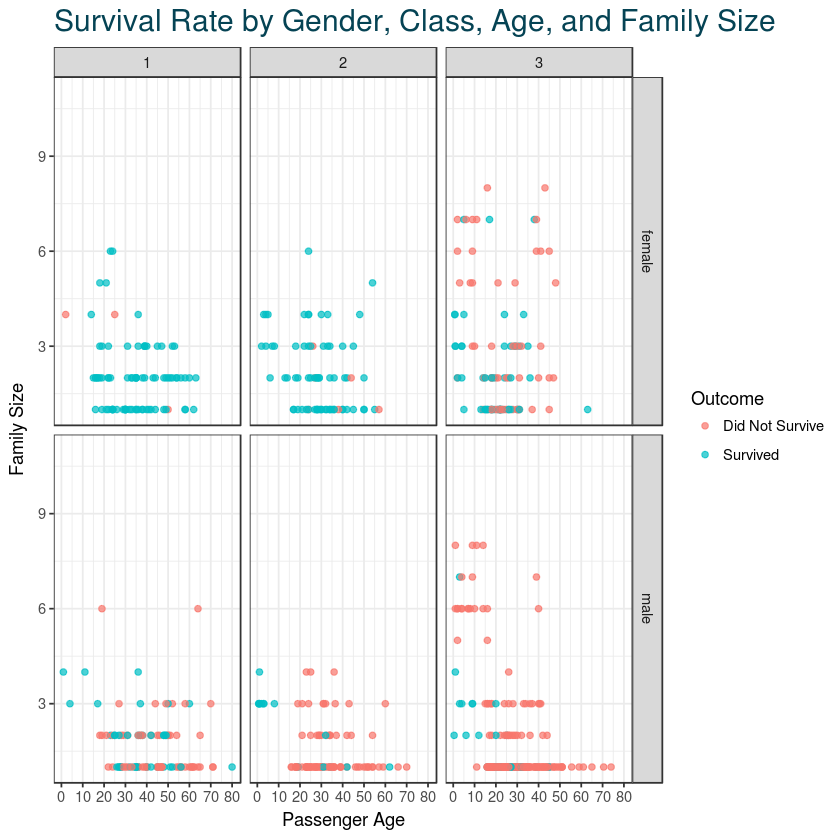

In [27]:
titanic %>%
  ggplot() +
  geom_point(aes(x = Age, y = FamilySize, color = Survived), alpha = 0.7) +
  facet_grid(Sex ~ Pclass) +
  theme_bw() +
  theme(plot.title = element_text(size=18, color = "#054354")) +
  ggtitle("Survival Rate by Gender, Class, Age, and Family Size") +
  scale_x_continuous(name= "Passenger Age", breaks = 10*c(0:8)) +
  scale_y_continuous(name = "Family Size") +
  scale_color_discrete(name = "Outcome", labels = c("Did Not Survive", "Survived"))  

- Younger Passengers from Smaller Families in Class 3 Survived
- Passengers from Bigger Families in Class 3 Did Not Survive

<hr>

# Conclusion

#### Gender: 
- Only 38% of people Survived (342 out of total of 891)
- 74% of Females Survived compared to only 19% of Males that Survived

#### Pclass:
- 63% of Pclass 1 Survived
- 47% of Pclass 2 Survived
- 24% of Pclass 3 Survived
  
#### Gender and Pclass:  
- Higher ratio of Male to Female in 3rd Pclass compared to 1st and 2nd Pclass
- 97% and 92% of Females Survived in Pclass 1 and Pclass 2 respectively compared to only 50% in Pclass 3
- 37% of Males in Pclass 1 Survived compared to only 16% and 14% in Pclass 2 and Pclass 3 respectively
    
#### Gender, Pclass and Age:
- Most Females in 1st Pclass Survived while majority of Males over the Age of 15 Did Not Survive
- Most Females in 2nd Pclass Survived while majority of Males over the Age of 10 Did Not Survive, and almost all Males Age 45 and above Did Not Survive
- 50% of Females in Pclass 3 Survived (can't tell much more looking at Age).  86% of Males in Pclass 3 Did Not Survive, and most Males 35 and above Did Not Survive

#### Gender, Pclass, Age, and Family Size:    
- Majority of Males and Females in 3rd Pclass with Family Size of 5 and above Did Not Survive
- Younger Passengers from smaller Families in Pclass 3 Survived